## Notebook Summary ##
#### *This contents of this notebook includes initial EDA & applicable data visualizations used for project.*
---

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
import pickle

In [2]:
#read in dataset & checkout df
recid_df = pd.read_csv('data/NIJ_s_Recidivism_Challenge_Full_Dataset.csv')
recid_df.head()

,ID,Gender,Race,Age_at_Release,Residence_PUMA,Gang_Affiliated,Supervision_Risk_Score_First,Supervision_Level_First,Education_Level,Dependents,...,DrugTests_Meth_Positive,DrugTests_Other_Positive,Percent_Days_Employed,Jobs_Per_Year,Employment_Exempt,Recidivism_Within_3years,Recidivism_Arrest_Year1,Recidivism_Arrest_Year2,Recidivism_Arrest_Year3,Training_Sample
0,1,M,BLACK,43-47,16,False,3.0,Standard,At least some college,3 or more,...,0.000000,0.0,0.488562,0.447610,False,False,False,False,False,1
1,2,M,BLACK,33-37,16,False,6.0,Specialized,Less than HS diploma,1,...,0.000000,0.0,0.425234,2.000000,False,True,False,False,True,1
2,3,M,BLACK,48 or older,24,False,7.0,High,At least some college,3 or more,...,0.166667,0.0,0.000000,0.000000,False,True,False,True,False,1
3,4,M,WHITE,38-42,16,False,7.0,High,Less than HS diploma,1,...,0.000000,0.0,1.000000,0.718996,False,False,False,False,False,1
4,5,M,WHITE,33-37,16,False,4.0,Specialized,Less than HS diploma,3 or more,...,0.058824,0.0,0.203562,0.929389,False,True,True,False,False,1


In [3]:
#look at columns
recid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25835 entries, 0 to 25834
Data columns (total 54 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 25835 non-null  int64  
 1   Gender                                             25835 non-null  object 
 2   Race                                               25835 non-null  object 
 3   Age_at_Release                                     25835 non-null  object 
 4   Residence_PUMA                                     25835 non-null  int64  
 5   Gang_Affiliated                                    22668 non-null  object 
 6   Supervision_Risk_Score_First                       25360 non-null  float64
 7   Supervision_Level_First                            24115 non-null  object 
 8   Education_Level                                    25835 non-null  object 
 9   Depend

In [4]:
# overall recidivism rate across entire dataset
recid_df['Recidivism_Within_3years'].sum()/recid_df['Recidivism_Within_3years'].count()

0.5768918134313915

In [5]:
#create a table of unique vals for categorical columns
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

uniq_vals_df = pd.DataFrame(columns = ['column', 'values'])

df_cat = recid_df.select_dtypes(include = 'object').copy()
uniq_vals = pd.DataFrame()

for c in df_cat.columns:
    uniq_vals['column'] = [c]
    uniq_vals['values'] = [df_cat[c].unique()]
    uniq_vals_df = uniq_vals_df.append(uniq_vals)

uniq_vals_df

,column,values
0,Gender,"[M, F]"
0,Race,"[BLACK, WHITE]"
0,Age_at_Release,"[43-47, 33-37, 48 or older, 38-42, 18-22, 23-27, 28-32]"
0,Gang_Affiliated,"[False, nan, True]"
0,Supervision_Level_First,"[Standard, Specialized, High, nan]"
0,Education_Level,"[At least some college, Less than HS diploma, High School Diploma]"
0,Dependents,"[3 or more, 1, 0, 2]"
0,Prison_Offense,"[Drug, Violent/Non-Sex, Property, nan, Other, Violent/Sex]"
0,Prison_Years,"[More than 3 years, 1-2 years, Less than 1 year, Greater than 2 to 3 years]"
0,Prior_Arrest_Episodes_Felony,"[6, 7, 8, 4, 10 or more, 3, 9, 2, 5, 1, 0]"


# EDA
---

In [6]:
# create separate df for recidivism within 3 years T or F
recid_true = recid_df[(recid_df['Recidivism_Within_3years'] == True)].copy()
recid_false = recid_df[(recid_df['Recidivism_Within_3years'] == False)].copy()

### *If an individual is not exempt from working during parole, if they are employed for 60% of the time, they are more likely to not be reincarcerated*

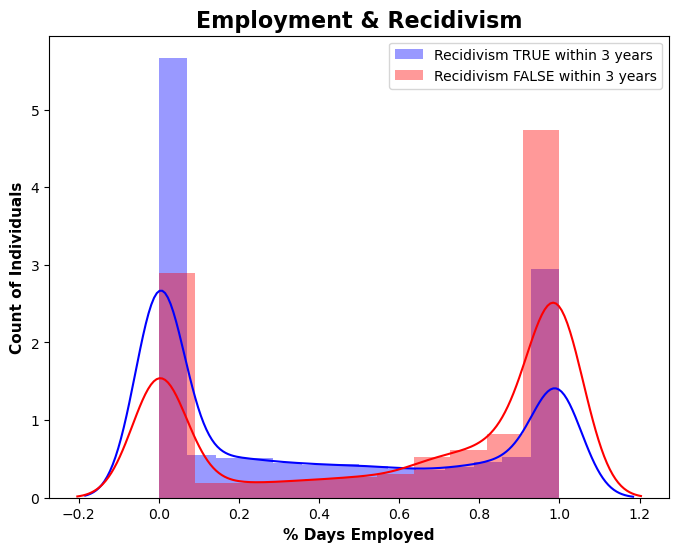

In [7]:
data1 = recid_true[recid_true['Employment_Exempt'] == False]
data2 = recid_false[recid_false['Employment_Exempt'] == False]

plt.figure(figsize=(8,6))
sns.distplot(data1['Percent_Days_Employed'], color='blue',label='Recidivism TRUE within 3 years')
sns.distplot(data2['Percent_Days_Employed'], color='red', label='Recidivism FALSE within 3 years')
plt.legend()
plt.xlabel('% Days Employed', fontweight='bold', fontsize=11)
plt.ylabel('Count of Individuals', fontweight='bold', fontsize=11)
plt.title('Employment & Recidivism', fontsize=16, fontweight='bold');

#export plot
plt.savefig('plots/employment.png',dpi=300, bbox_inches = "tight")

### Recidivism by PUMA region

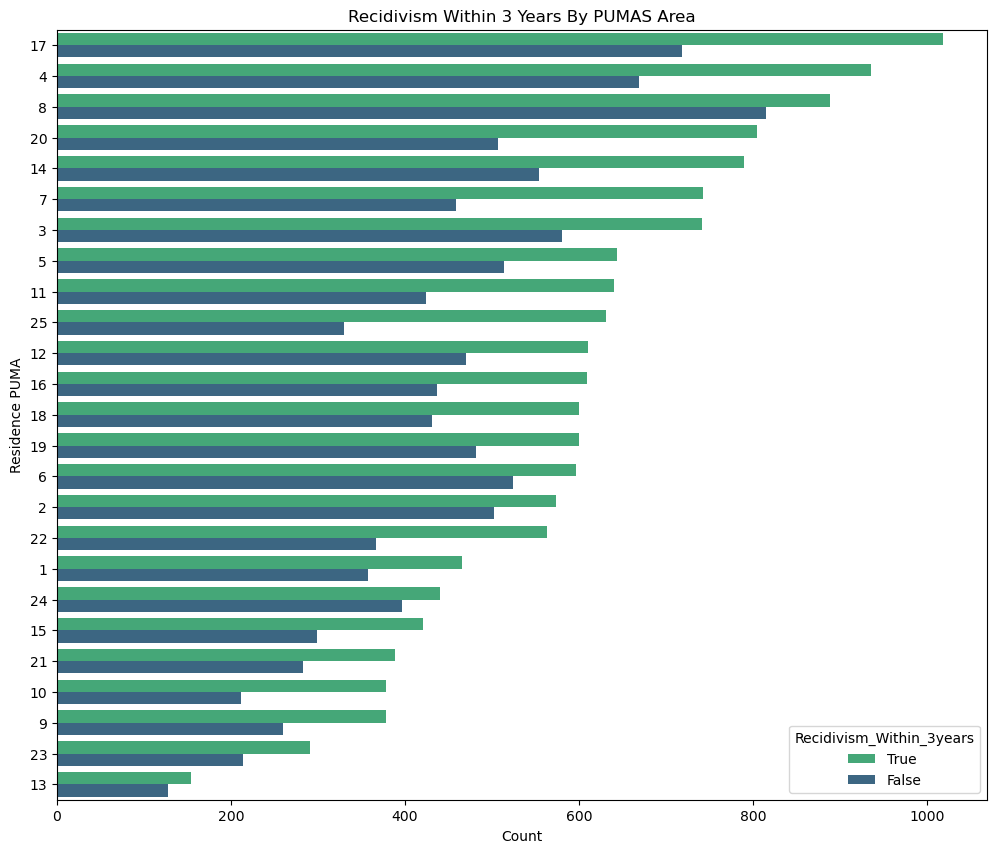

In [8]:
#plot
plt.figure(figsize = (12,10))
sns.countplot(data=recid_df,
              y='Residence_PUMA',
              hue='Recidivism_Within_3years',
              hue_order =[True, False],
              orient='h',
              palette='viridis_r',
              order=recid_df[recid_df['Recidivism_Within_3years'] == True].groupby('Residence_PUMA').count().sort_values('Recidivism_Within_3years', ascending=False).index);

plt.title('Recidivism Within 3 Years By PUMAS Area')
plt.ylabel('Residence PUMA')
plt.xlabel('Count');

#you can see areas where there are less individuals who recidivate. Would be curious to see if we can map all of these areas

In [9]:
#create two separate dfs for recidivism True vs False
recid_t = recid_df[recid_df['Recidivism_Within_3years'] == True].groupby(['Residence_PUMA'])[['Recidivism_Within_3years']].count()
recid_f = recid_df[recid_df['Recidivism_Within_3years'] == False].groupby(['Residence_PUMA'])[['Recidivism_Within_3years']].count()

#rename column names
recid_f.rename(columns={'Recidivism_Within_3years': 'Recidivism_Within_3years_f'}, inplace=True)
recid_t.rename(columns={'Recidivism_Within_3years': 'Recidivism_Within_3years_t'}, inplace=True)

In [10]:
#join these dfs together
recid = recid_t.join(recid_f)

#create a new col - recid difference in %
recid['recid_diff'] = (recid['Recidivism_Within_3years_t']/(recid['Recidivism_Within_3years_t'] + recid['Recidivism_Within_3years_f'])) - (recid['Recidivism_Within_3years_f']/(recid['Recidivism_Within_3years_t'] + recid['Recidivism_Within_3years_f']))

#create a new col - of those that recid, what % of each
recid['%recid_true'] = (recid['Recidivism_Within_3years_t']/(recid['Recidivism_Within_3years_t'] + recid['Recidivism_Within_3years_f']))
recid.sort_values(by='%recid_true', ascending=False).head(7)

,Recidivism_Within_3years_t,Recidivism_Within_3years_f,recid_diff,%recid_true
Residence_PUMA,,,,
25,631,330,0.313215,0.656608
10,378,212,0.281356,0.640678
7,743,459,0.236273,0.618136
20,805,507,0.227134,0.613567
22,563,367,0.210753,0.605376
11,640,424,0.203008,0.601504
9,378,260,0.184953,0.592476


### Distribution of difference in recidivism vs no recidivism across 23 puma regions

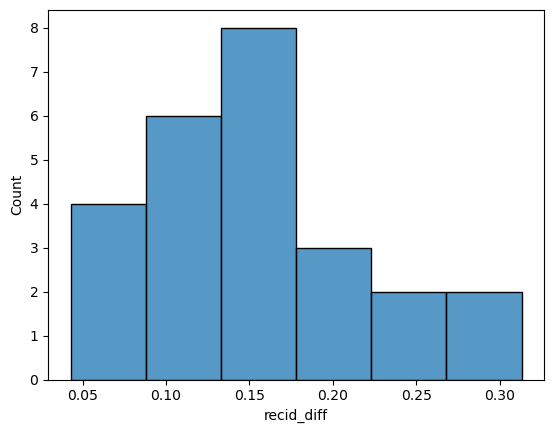

In [11]:
#is there anything similar or obvious about the regions?
sns.histplot(data=recid, x='recid_diff');

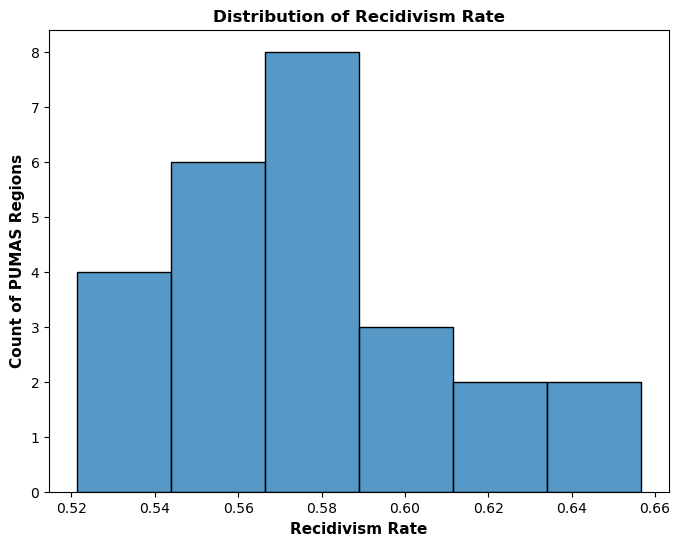

In [12]:
# distribution of recidivism across 23 puma regions

plt.figure(figsize=(8,6))
sns.histplot(data=recid, x='%recid_true', cbar='steelblue')
plt.title('Distribution of Recidivism Rate', fontweight='bold')
plt.ylabel('Count of PUMAS Regions', fontsize=11, fontweight='bold')
plt.xlabel('Recidivism Rate', fontsize=11, fontweight='bold');

#export plot
plt.savefig('plots/recidrate_hist.png',dpi=300, bbox_inches = "tight")

## Gender
---

In [13]:
#group by race and then age at release
recid_df[recid_df['Gender'] == 'F'].groupby(['Race','Age_at_Release'])['Recidivism_Within_3years'].sum().unstack()

Age_at_Release,18-22,23-27,28-32,33-37,38-42,43-47,48 or older
Race,,,,,,,
BLACK,33,112,87,70,57,56,59
WHITE,42,170,207,195,142,115,97


### *Across both genders, individuals between the ages between 23-32 are the most likely to recidivate within 3 years*

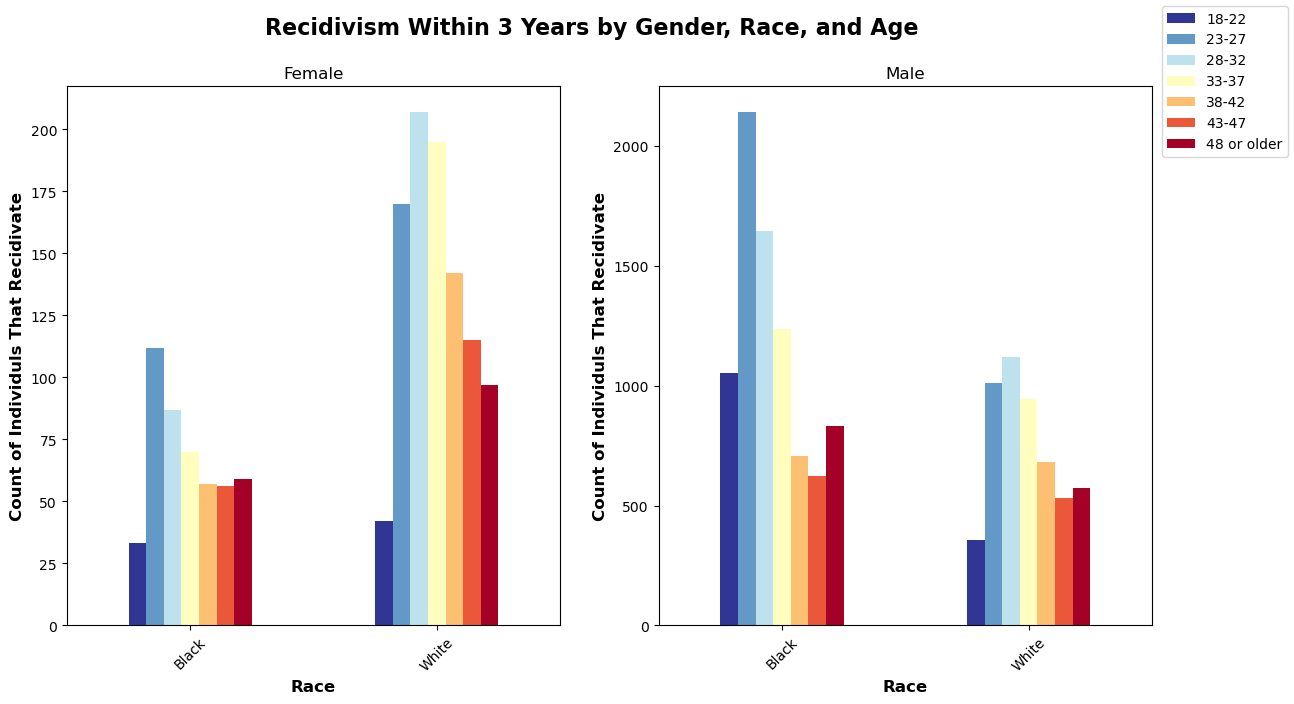

In [14]:
#create subplots
fig, ax = plt.subplots(1,2, figsize=(14,7))

recid_df[recid_df['Gender'] == 'F'].groupby(['Race','Age_at_Release'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar',
                                                                                               cmap='RdYlBu_r', legend=False, ax=ax[0])

recid_df[recid_df['Gender'] == 'M'].groupby(['Race','Age_at_Release'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar',
                                                                                                cmap='RdYlBu_r',legend=False, ax=ax[1])

fig.suptitle('Recidivism Within 3 Years by Gender, Race, and Age', fontsize=16, fontweight='bold')

#set legend for entire plot
handles, labels = ax[1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right')

#set subplot titles, labels
ax[0].set_title('Female')
ax[1].set_title('Male')
ax[0].set_xlabel('Race', fontweight='bold', fontsize=12)
ax[1].set_xlabel('Race', fontweight='bold', fontsize=12)
ax[0].set_ylabel('Count of Individuls That Recidivate', fontweight='bold', fontsize=12)
ax[1].set_ylabel('Count of Individuls That Recidivate', fontweight='bold', fontsize=12)

# how can I rotate this for both subplots?
# plt.xticks(rotation = 45)
ax[0].set_xticklabels(['Black', 'White'], rotation=45)
ax[1].set_xticklabels(['Black', 'White'], rotation=45);

#export plot
plt.savefig('plots/gender_race_age.png',dpi=300, bbox_inches = "tight")

## Gender with Dependents

### *Across both genders, individuals with either 0 or 3 or more dependents more likely to reoffend*

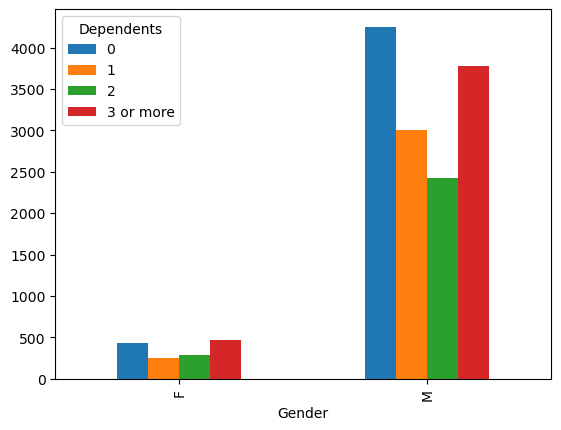

In [15]:
recid_df.groupby(['Gender', 'Dependents'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar');

### *We were curious and wanted to look at age breakdown of those that recid for those that have 0  or 3 or more dependents*
- For those without dependents, 23-27, younger individual are most likely to recid
- For this with 3 ore more dependents, 

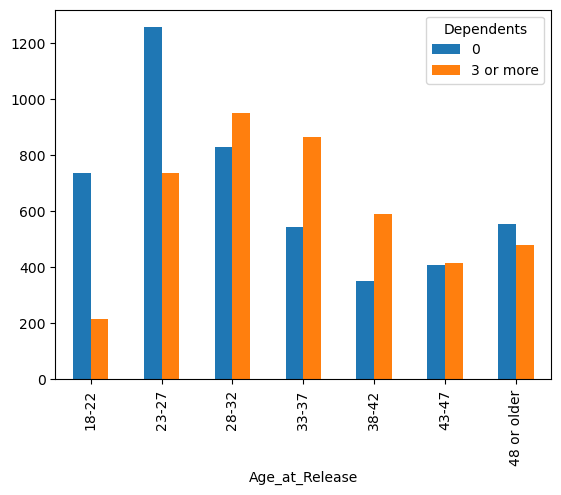

In [16]:
recid_df[(recid_df['Dependents'] == '0') | (recid_df['Dependents'] == '3 or more')].groupby(['Age_at_Release', 'Dependents'])['Recidivism_Within_3years'].sum().unstack().plot(kind='bar');

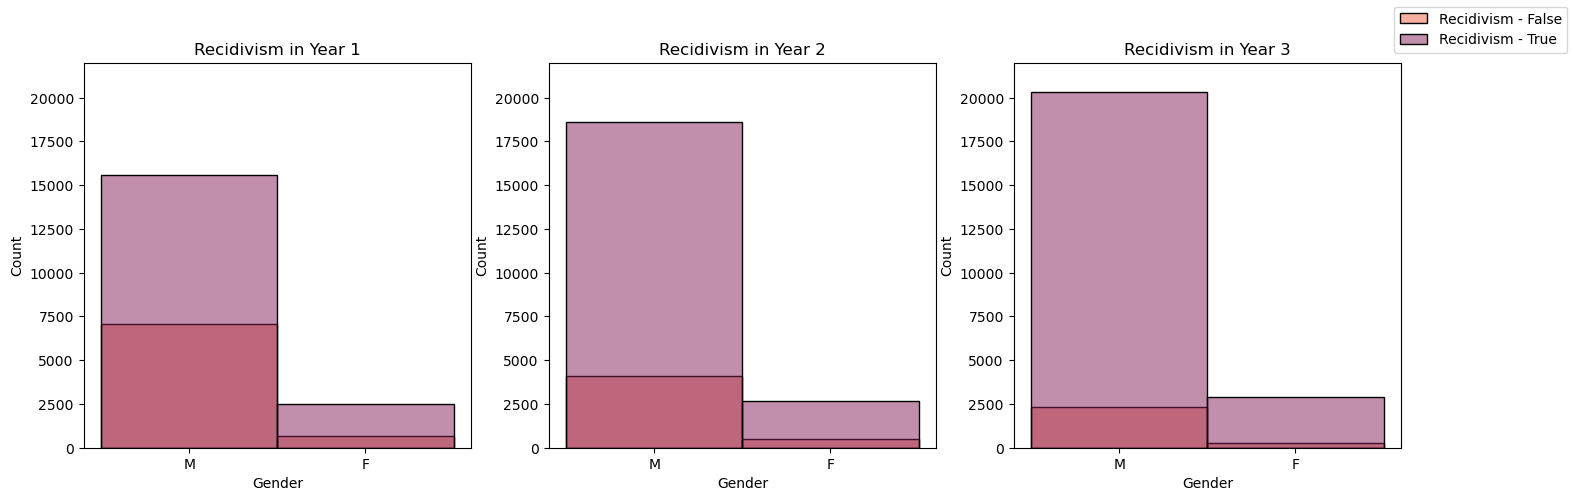

In [17]:
#create subplots
fig, ax = plt.subplots(1,3, figsize=(17,5))

ax1 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year1', palette='rocket', ax=ax[0], legend = False)
ax2 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year2', palette='rocket', ax=ax[1], legend = False)
ax3 = sns.histplot(data=recid_df, x = 'Gender', hue='Recidivism_Arrest_Year3', palette='rocket', ax=ax[2], legend = False)

ax1.title.set_text('Recidivism in Year 1')
ax2.title.set_text('Recidivism in Year 2')
ax3.title.set_text('Recidivism in Year 3')

ax1.set_ylim(0,22_000)
ax2.set_ylim(0,22_000)
ax3.set_ylim(0,22_000)

# Labels to use in the legend for each line
labels = ["Recidivism - False", "Recidivism - True"]

fig.legend([ax1, ax2, ax3], labels=labels,
           loc="upper right");

#### - recidivism among female individuals stay pretty constant year to year
#### - recidivism among male individuals increases year to to year

## PUMAS Supplemental Dataset
---

In [18]:
#read in the census PUMAs data
pumas = pd.read_csv('data/census_puma_data.csv')
pumas.head()

,Code,PUMAs_code,region_name,income_to_pov_ratio13,property_val_13
0,1,1003,Atlanta Regional Commission (Central)--Fulton County (Central)--Atlanta City (South) PUMA,235,72527
1,1,4400,Atlanta Regional Commission (Southwest)--Douglas County PUMA,277,94404
2,2,1008,Atlanta Regional Commission (Central)--DeKalb County (South) PUMA,267,77810
3,2,4300,Atlanta & Northeast Georgia Regional Commissions--Newton & Rockdale Counties PUMA,273,91019
4,3,1200,Heart of Georgia Altamaha Regional Commission (Southeast) PUMA,206,56918


In [19]:
pumas.shape

(72, 5)

In [20]:
#group by PUMAs and take the mean of pumas within each region
pumas_df = pumas.groupby('Code')[['income_to_pov_ratio13']].mean().sort_values(by='income_to_pov_ratio13', ascending=False)
pumas_df.head()

,income_to_pov_ratio13
Code,
12,325.428571
15,321.000000
13,317.000000
23,311.333333
21,295.000000


In [21]:
#create a new column - among those that recid, % of PUMAs area
recid['recidt_%puma'] = recid['Recidivism_Within_3years_t']/(recid['Recidivism_Within_3years_t'].sum())

#join this with the above df
df = recid[['recidt_%puma']]
pumas_df = pumas_df.join(df)

#sort values
pumas_df.sort_values(by='recidt_%puma', ascending=False)

,income_to_pov_ratio13,recidt_%puma
Code,,
17,244.500000,0.068304
4,246.000000,0.062735
8,263.000000,0.059581
20,263.333333,0.054012
14,285.250000,0.053006
7,238.666667,0.049852
3,205.000000,0.049718
5,223.000000,0.043210
11,274.000000,0.042941


<Figure size 600x800 with 0 Axes>

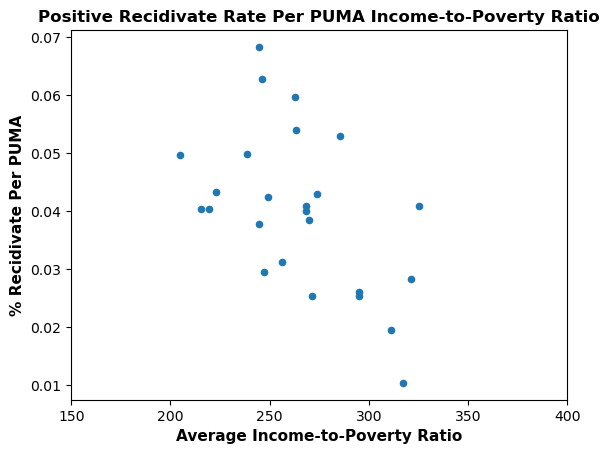

In [22]:
plt.figure(figsize=(6,8))
pumas_df.plot.scatter(x='income_to_pov_ratio13', 
                      y='recidt_%puma')

plt.title('Positive Recidivate Rate Per PUMA Income-to-Poverty Ratio', fontweight='bold')
plt.xlabel('Average Income-to-Poverty Ratio', fontsize=11, fontweight='bold')
plt.ylabel('% Recidivate Per PUMA', fontsize=11, fontweight='bold')
plt.xlim(150,400);

#export plot
plt.savefig('plots/recidrateperpuma.png',dpi=300, bbox_inches = "tight")

# the income-to-poverty ratio increases, recidivism decreases in PUMAS regions

## Gang Affiliation

In [23]:
#create a df to groupby prison offense and gang affiliation to show recidivism rate

gang_df = recid_df.groupby(['Prison_Offense', 'Gang_Affiliated']).agg({'Recidivism_Within_3years': 'sum', 'ID': 'count'})
gang_df['recid_rate'] = gang_df['Recidivism_Within_3years'] / gang_df['ID']
gang_df.drop(columns=['Recidivism_Within_3years', 'ID'], inplace=True)
gang_df

recid_rate
Prison_Offense  Gang_Affiliated            
Drug            False            0.525144  
                True             0.803922  
Other           False            0.588491  
                True             0.791667  
Property        False            0.629706  
                True             0.827445  
Violent/Non-Sex False            0.496412  
                True             0.757920  
Violent/Sex     False            0.278884  
                True             0.675325

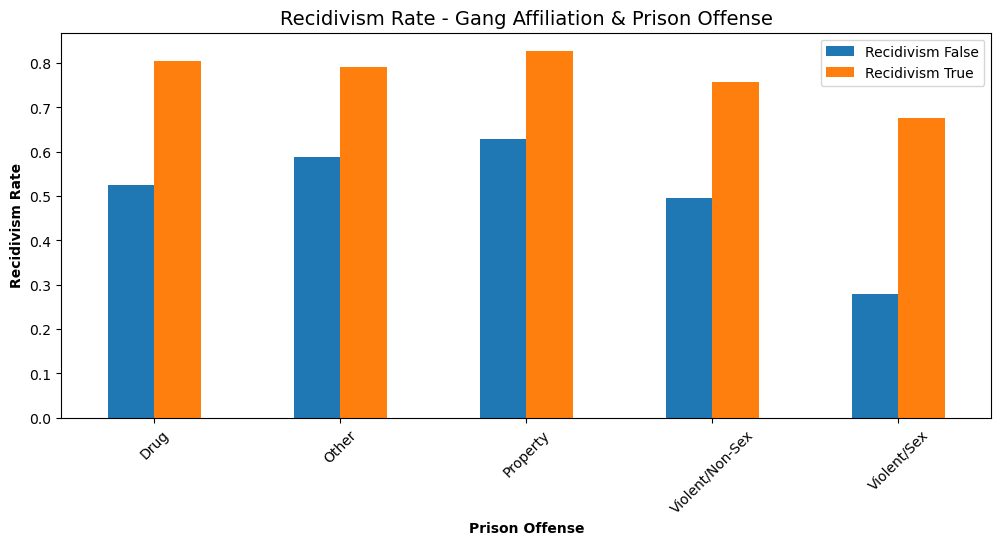

In [24]:
gang_df.sort_values(by=['recid_rate', 'Gang_Affiliated']).unstack().plot(kind='bar',
                                                                         figsize=(12,5),
                                                                         legend=False)
labels = ['Recidivism False', 'Recidivism True']

plt.legend(labels)
plt.title('Recidivism Rate - Gang Affiliation & Prison Offense', fontsize=14)
plt.ylabel('Recidivism Rate', fontweight='bold')
plt.xlabel('Prison Offense', fontweight='bold')
plt.xticks(rotation=45);

#export plot
plt.savefig('plots/gangaffil_prisonoffense.png',dpi=300, bbox_inches = "tight")

In [25]:
recid_df.columns

Index(['ID', 'Gender', 'Race', 'Age_at_Release', 'Residence_PUMA',
       'Gang_Affiliated', 'Supervision_Risk_Score_First',
       'Supervision_Level_First', 'Education_Level', 'Dependents',
       'Prison_Offense', 'Prison_Years', 'Prior_Arrest_Episodes_Felony',
       'Prior_Arrest_Episodes_Misd', 'Prior_Arrest_Episodes_Violent',
       'Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug',
       'Prior_Arrest_Episodes_PPViolationCharges',
       'Prior_Arrest_Episodes_DVCharges', 'Prior_Arrest_Episodes_GunCharges',
       'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Misd',
       'Prior_Conviction_Episodes_Viol', 'Prior_Conviction_Episodes_Prop',
       'Prior_Conviction_Episodes_Drug',
       'Prior_Conviction_Episodes_PPViolationCharges',
       'Prior_Conviction_Episodes_DomesticViolenceCharges',
       'Prior_Conviction_Episodes_GunCharges', 'Prior_Revocations_Parole',
       'Prior_Revocations_Probation', 'Condition_MH_SA', 'Condition_Cog_Ed',
     

## YoY Exploration

<AxesSubplot:ylabel='Education_Level'>

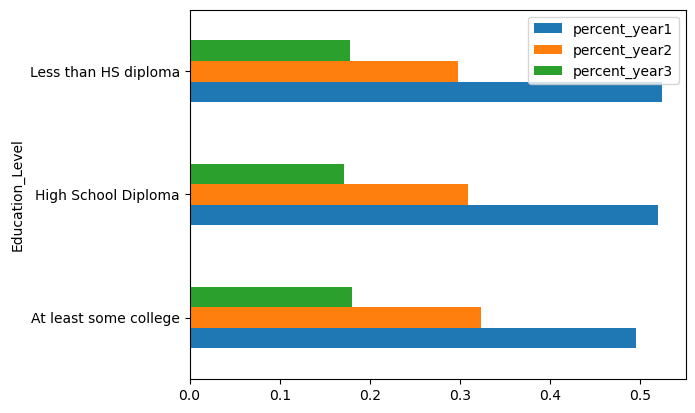

In [26]:
yoy = recid_df.groupby(['Education_Level'])[['Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3', 'Recidivism_Within_3years']].sum()

#add % recidivism cols
yoy['percent_year1'] = yoy['Recidivism_Arrest_Year1']/yoy['Recidivism_Within_3years']
yoy['percent_year2'] = yoy['Recidivism_Arrest_Year2']/yoy['Recidivism_Within_3years']
yoy['percent_year3'] = yoy['Recidivism_Arrest_Year3']/yoy['Recidivism_Within_3years']

#plot
yoy[['percent_year1', 'percent_year2', 'percent_year3']].plot(kind = 'barh')

### Writing a Function to Plot Analysis of Categorical Columns

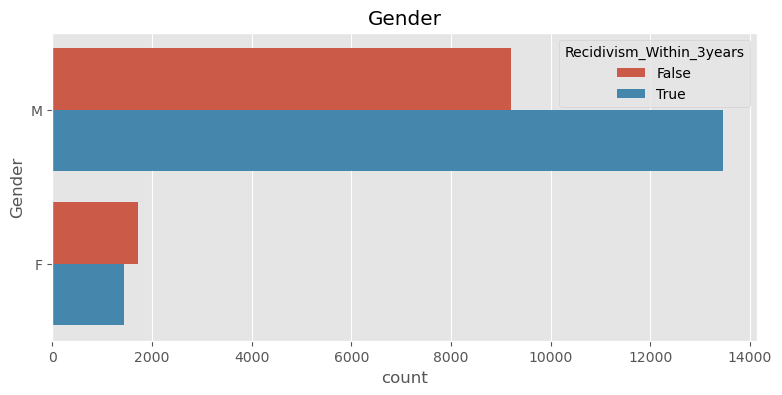

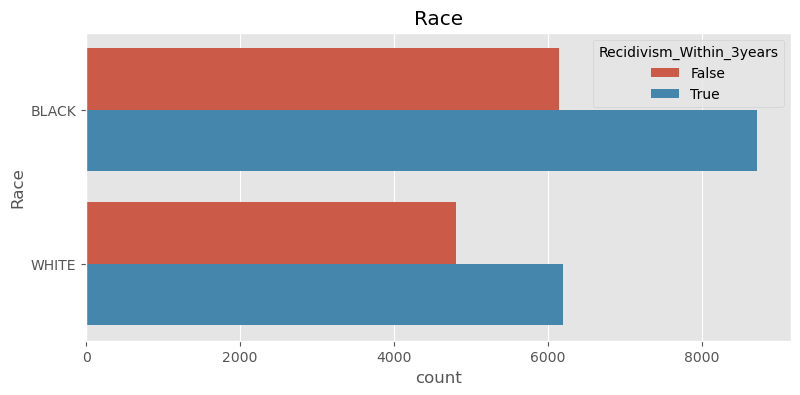

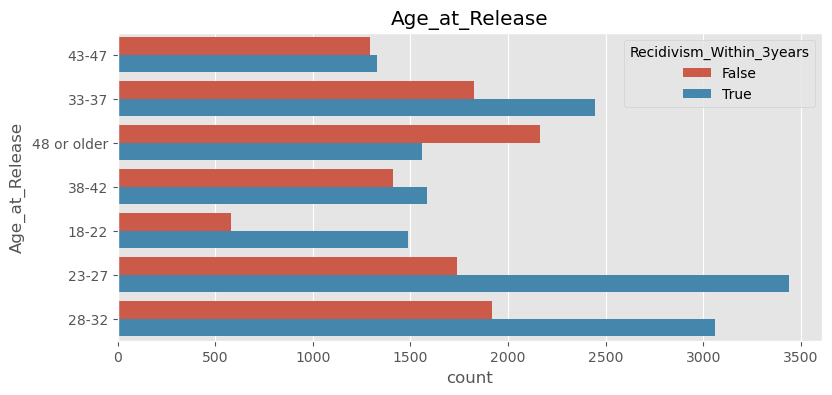

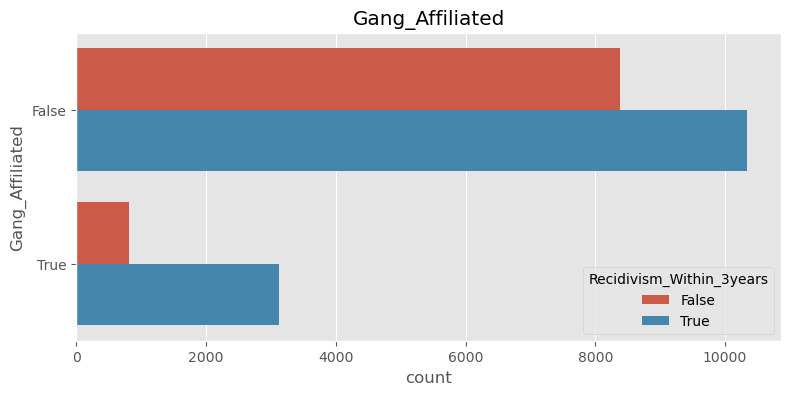

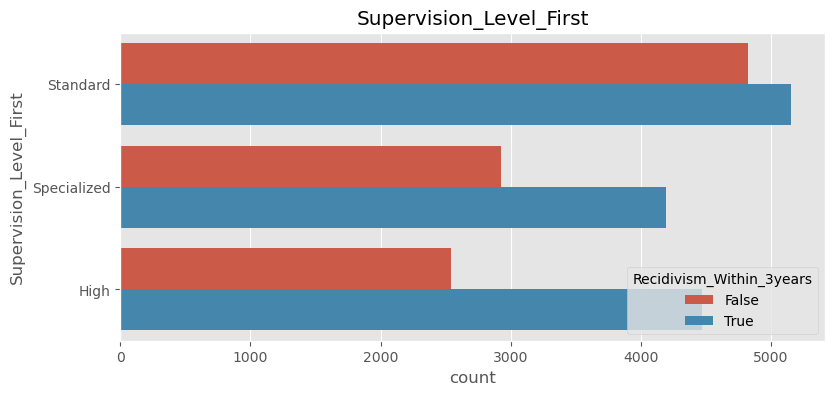

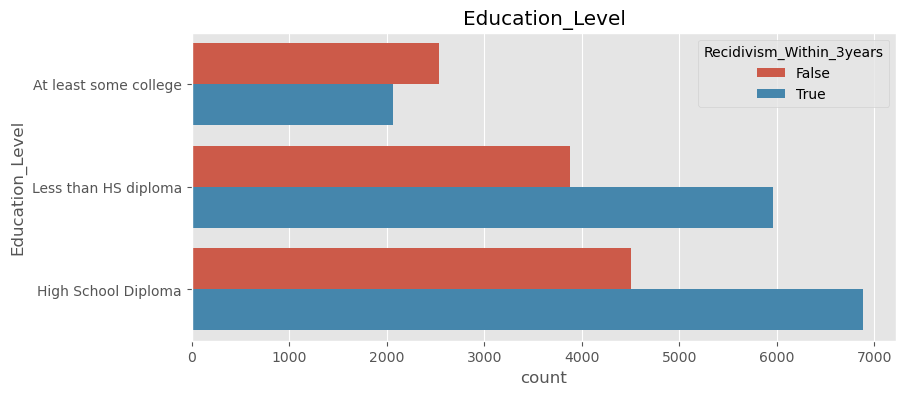

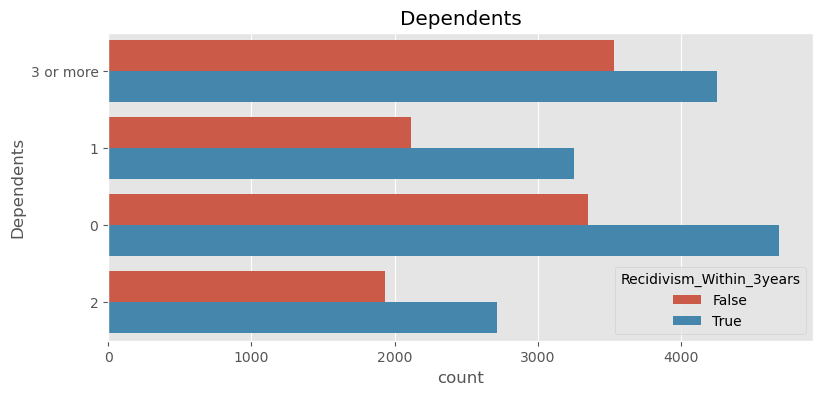

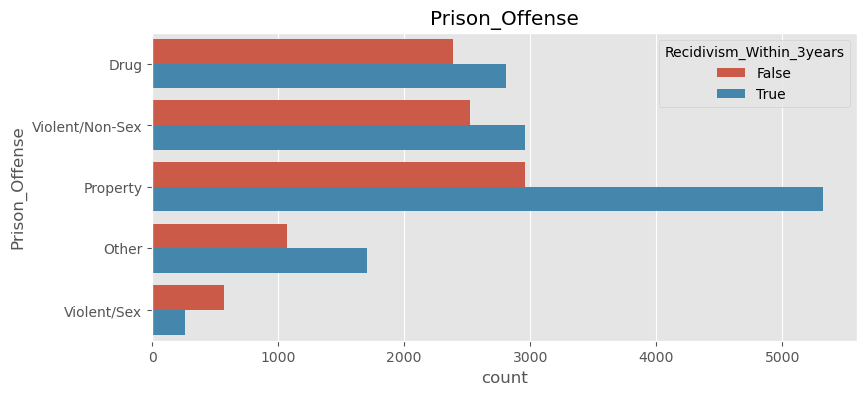

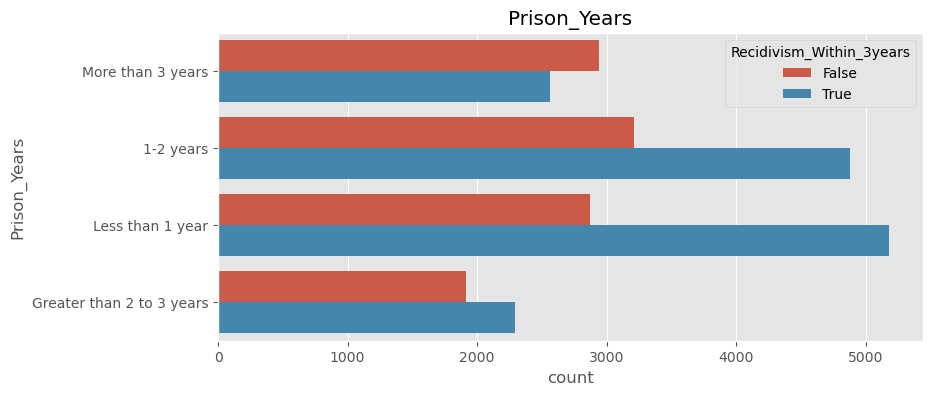

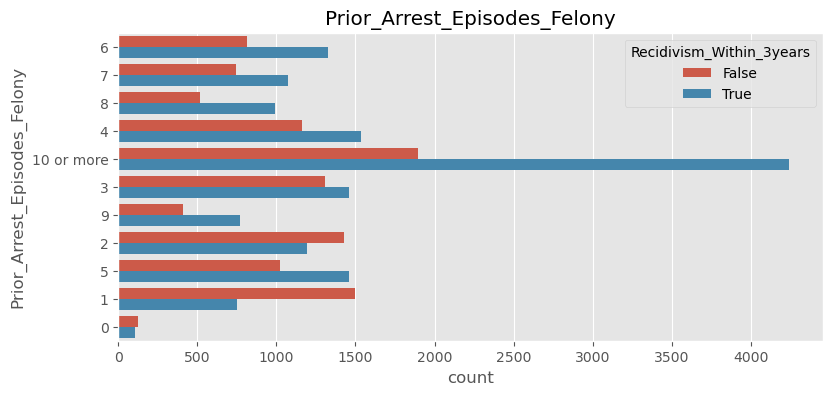

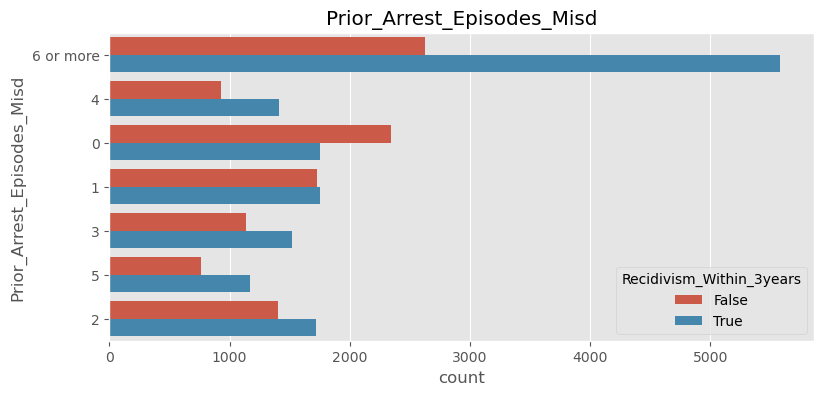

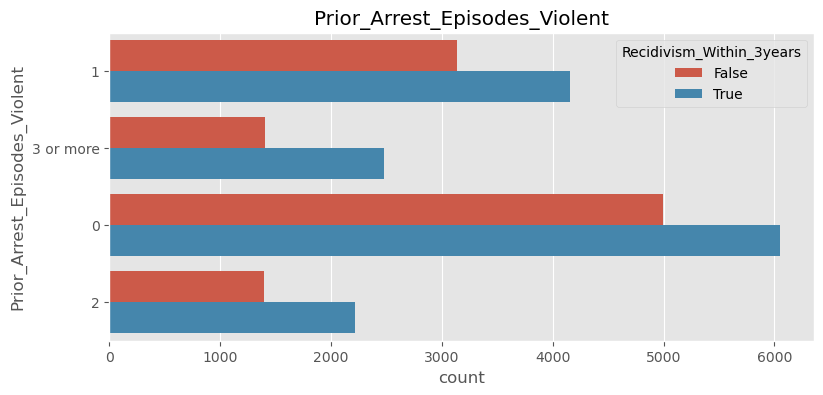

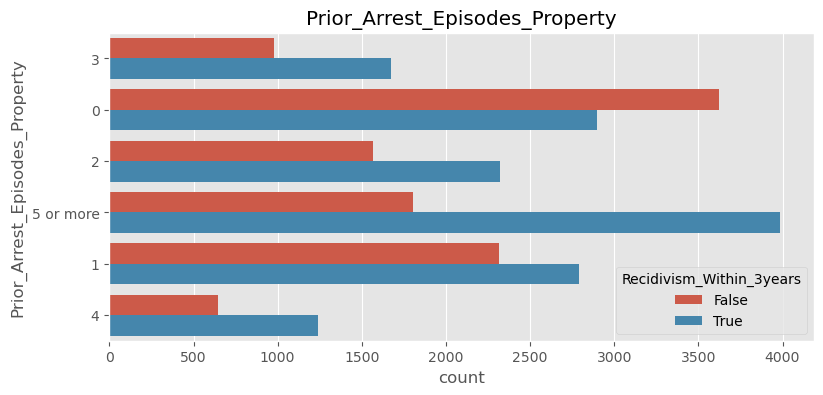

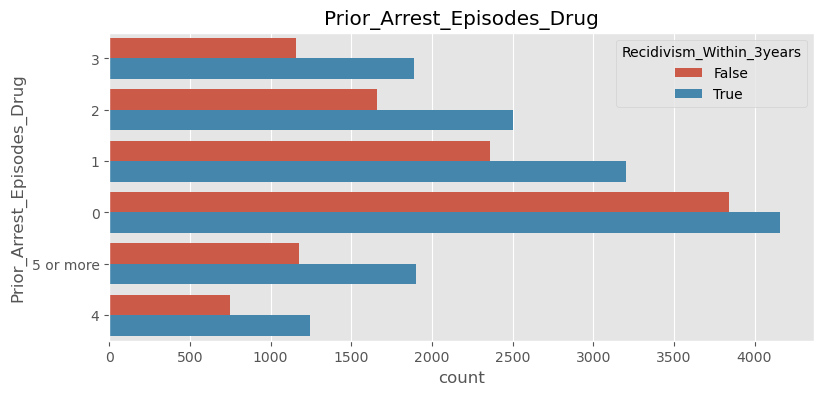

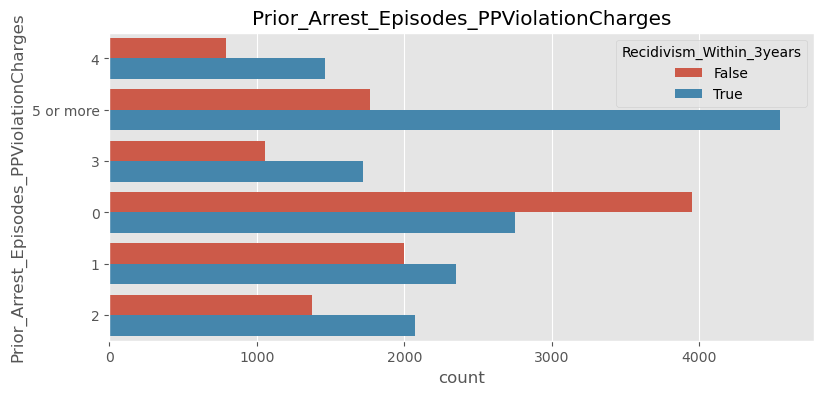

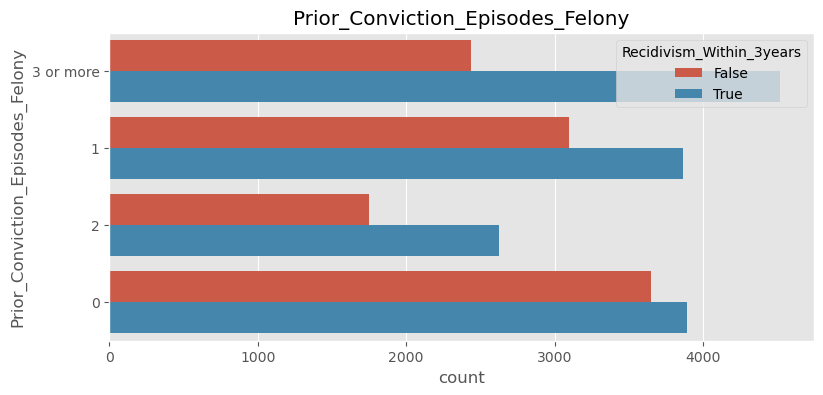

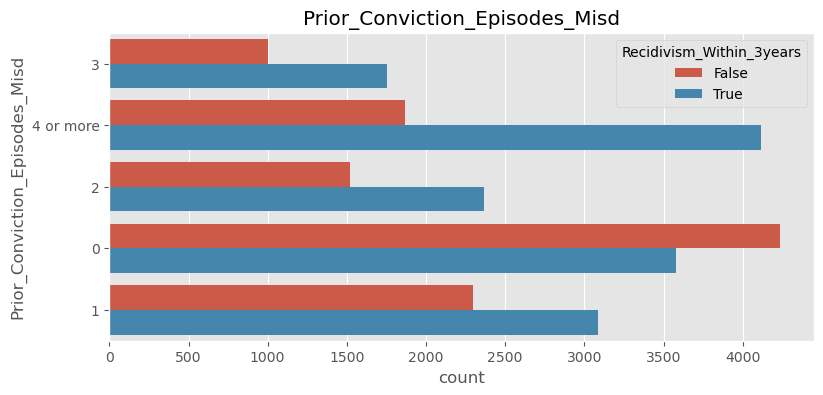

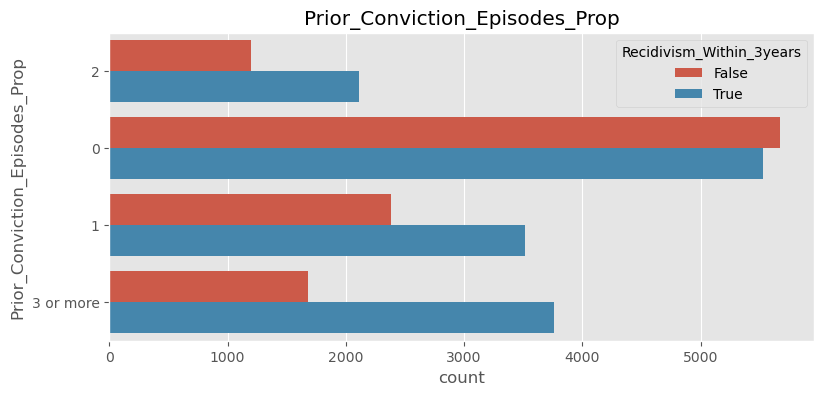

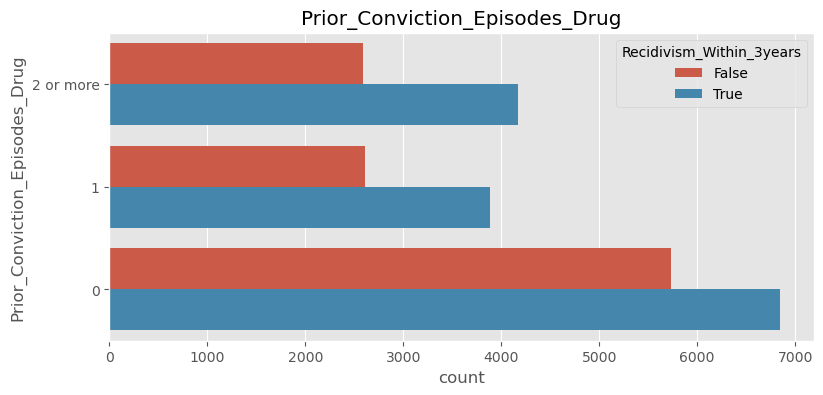

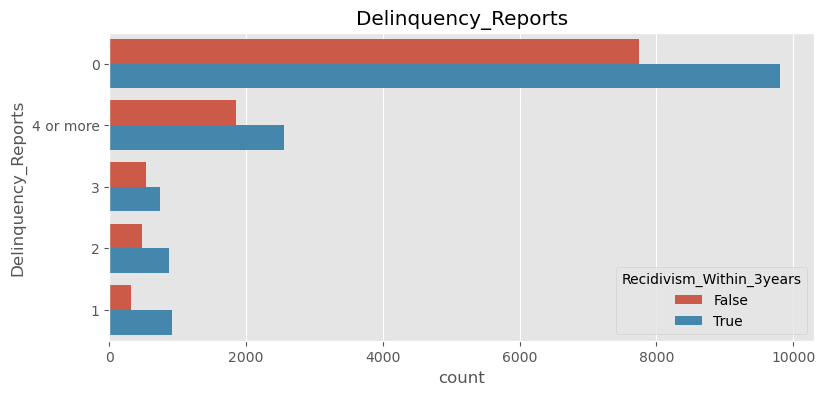

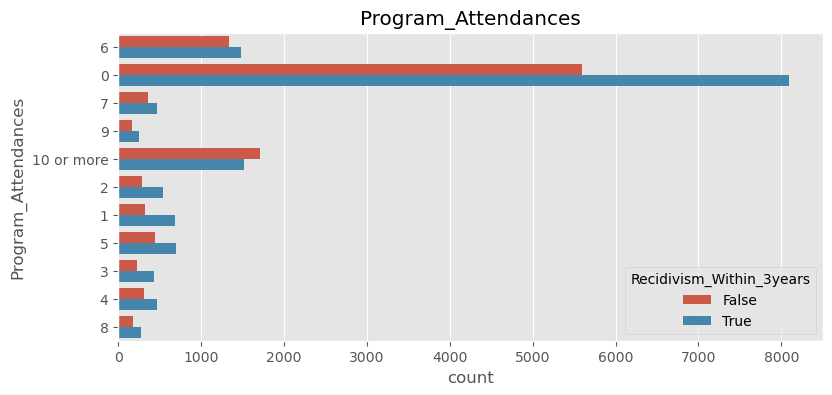

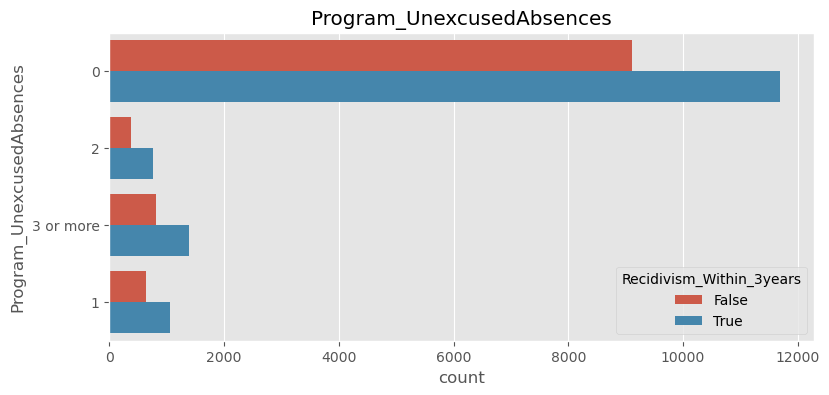

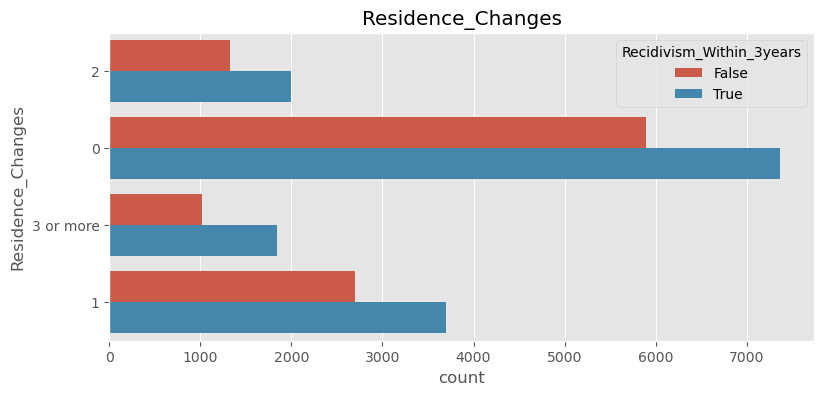

In [27]:
cols = df_cat.columns.values
plt.style.use("ggplot")

for c in cols:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(y=recid_df[c], hue=recid_df['Recidivism_Within_3years'], orient='h')
    plt.title(c)

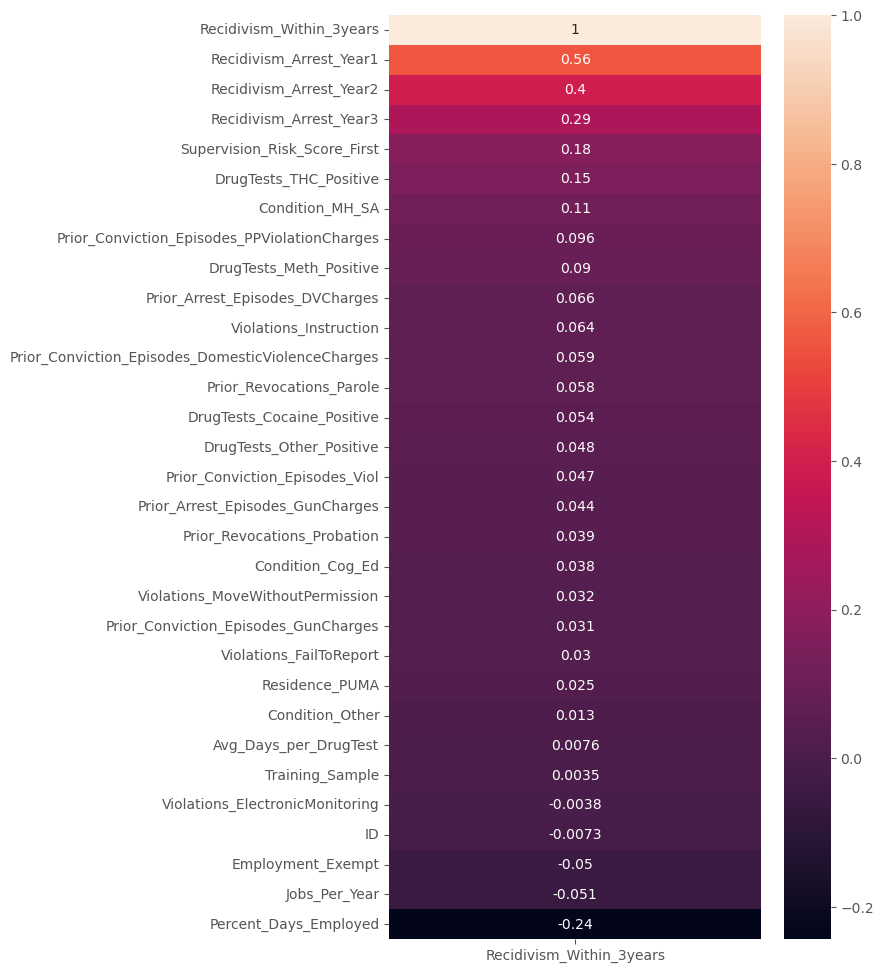

In [28]:
#plot correlation of features to target val
plt.figure(figsize=(6,12))
sns.heatmap(recid_df.corr()[['Recidivism_Within_3years']].sort_values('Recidivism_Within_3years', ascending=False),
            annot=True);

## Logistic Regression Feature Importances

In [29]:
#loading in pickles data from log regression coefficients from modeling notebook
logreg_features = pickle.load(open('pickles/lr_coef_df.pkl', 'rb'))

In [30]:
features1 = logreg_features.head(10)
features1.index = [x.replace('_', ' ') for x in features1.index]
features1

,coef,odd_ratio
gang affiliated,0.278006,1.320494
prior arrest episodes felony,0.242007,1.273803
age at release 23-27,0.235596,1.265662
age at release 18-22,0.230575,1.259324
gender,0.160013,1.173527
prior arrest episodes ppviolationcharges,0.157116,1.170132
condition mh sa,0.144291,1.155220
prior arrest episodes property,0.141249,1.151712
prior arrest episodes misd,0.138697,1.148776
supervision risk score first,0.126380,1.134714


- odds ratio of 1 means there's a 50-50 chance. the success to failure ratio is 1-1. Anything over 1 has odds more inclined to go the success class which is recidivate
- if an individual is gang affiliated there odds of recidivating increased by 32%
- 132:100 success to fail

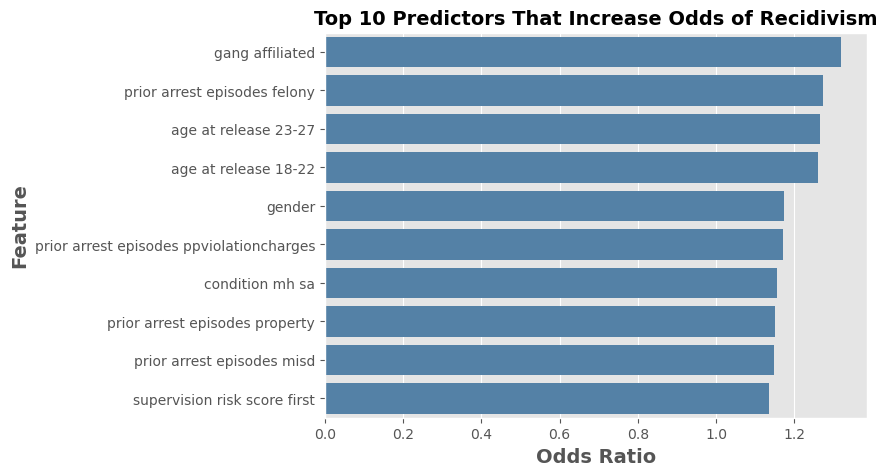

In [31]:
#create plot

#plot a barplot of top 10 predictive words of recidivism
plt.figure(figsize=(7,5))
sns.barplot(data=features1, x='odd_ratio', y=features1.index,
           color='steelblue')

plt.title('Top 10 Predictors That Increase Odds of Recidivism',
          fontsize=14,
          fontweight='bold')
plt.xlabel('Odds Ratio',
           fontsize=14,
          fontweight='bold')
plt.ylabel('Feature',
          fontsize=14,
          fontweight='bold');

plt.savefig('plots/top10_recidivate.png',dpi=300, bbox_inches = "tight")

In [32]:
features2 = logreg_features.tail(10).sort_values(by='coef')
features2.index = [x.replace('_', ' ') for x in features2.index]
features2

,coef,odd_ratio
percent days employed,-0.459830,0.631391
delinquency reports,-0.245051,0.782664
age at release 48 or older,-0.202045,0.817058
program attendances,-0.148597,0.861916
prison years More than 3 years,-0.097499,0.907104
prison years Greater than 2 to 3 years,-0.088550,0.915257
age at release 43-47,-0.084320,0.919137
prior conviction episodes ppviolationcharges,-0.046228,0.954824
employment exempt,-0.044077,0.956881
prison offense Drug,-0.040964,0.959863


- towards 0 class
- if an individual increases their percent days employed by 1 unit, the odd of not recidivating (class 0) goes up by 37%
- .63:1 success to fail

In [33]:
Top 10 Features that decreass odds of recidivating

SyntaxError: invalid syntax (2092696168.py, line 1)

In [ ]:
#create plot

#plot a barplot of top 10 predictive words of recidivism
plt.figure(figsize=(7,5))
sns.barplot(data=features2, x='odd_ratio', y=features2.index,
           color='lightslategrey')

plt.title('Top 10 Features That Decrease Odds of Recidivating',
          fontsize=14,
          fontweight='bold')
plt.xlabel('Odds Ratio',
           fontsize=14,
          fontweight='bold')
plt.ylabel('Feature',
          fontsize=14,
          fontweight='bold');

plt.savefig('plots/top10_decreaseodds.png',dpi=300, bbox_inches = "tight")